In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finance-news/All_external.csv


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from transformers import pipeline
from datetime import timedelta


2025-09-18 16:28:10.670856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758212890.873671      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758212890.931866      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/finance-news/All_external.csv")
df.head()

/tmp/ipykernel_36/2652442091.py:1: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/finance-news/All_external.csv")
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,A,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,A,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,A,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,A,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,A,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_new = df

In [4]:
df_new['Date'] = pd.to_datetime(df_new['Date'], errors='coerce')

# Keep only rows within the time frame
df_new = df_new[(df_new['Date'] >= '2011-01-01') & (df_new['Date'] <= '2017-12-31')]
df_new = df_new[['Date', 'Article_title', 'Stock_symbol']]
df_new = df_new.dropna(subset=['Stock_symbol'])


In [5]:
df_new.count()

Date             1947163
Article_title    1947163
Stock_symbol     1947163
dtype: int64

In [6]:
print(len(df["Stock_symbol"].unique()))

6620


In [7]:
djia_tickers = [
    "AAPL","AXP","BA","CAT","CSCO","CVX","DIS","DWDP","GS",
    "HD","IBM","INTC","JNJ","JPM","KO","MCD","MMM","MRK",
    "MSFT","NKE","PFE","PG","TRV","UNH","UTX","V","VZ",
    "WBA","WMT","XOM"
]

df = df[df['Stock_symbol'].isin(djia_tickers)]


In [8]:
print(len(df["Stock_symbol"].unique()))

24


In [9]:

df_new.to_csv("findata.csv")

In [10]:
df_fin = pd.read_csv("findata.csv")

In [11]:
df_fin = df_fin.sort_values(by='Date', ascending=False).reset_index(drop=True)
print("First 5 rows of df_fin:")
print(df_fin.head())

# Full DJIA tickers list (2011–2019)
djia_tickers = [
    "AAPL","AXP","BA","CAT","CSCO","CVX","DIS","DWDP","GS",
    "HD","IBM","INTC","JNJ","JPM","KO","MCD","MMM","MRK",
    "MSFT","NKE","PFE","PG","TRV","UNH","UTX","V","VZ",
    "WBA","WMT","XOM"
]

# Step 1: Get tickers present in news_df
tickers_in_news = df_fin['Stock_symbol'].dropna().unique().tolist()
print(f"Total tickers in news: {len(tickers_in_news)}")

# Step 2: Filter only those that are also in DJIA
djia_in_news = [t for t in tickers_in_news if t in djia_tickers]
print("Tickers found in both news and DJIA:", djia_in_news)
print(f"Number of DJIA tickers found: {len(djia_in_news)}")

First 5 rows of df_fin:
   Unnamed: 0                       Date  \
0     3871472  2017-12-31 00:00:00+00:00   
1     4025751  2017-12-31 00:00:00+00:00   
2     3154960  2017-12-31 00:00:00+00:00   
3     2498159  2017-12-31 00:00:00+00:00   
4     2498160  2017-12-31 00:00:00+00:00   

                                       Article_title Stock_symbol  
0  A. O. Smith, S&P Global Expected To Lead 14 Di...          UBA  
1                China factory growth eases slightly          XPP  
2  A. O. Smith, S&P Global Expected To Lead 14 Di...          KMB  
3                China factory growth eases slightly          CHN  
4  Daily Insider Ratings Round Up 12/28/17: RETA,...          CHN  
Total tickers in news: 6266
Tickers found in both news and DJIA: ['VZ', 'AXP', 'KO', 'MCD', 'TRV', 'PG', 'IBM', 'CSCO', 'PFE', 'WBA', 'MRK', 'HD', 'JNJ', 'MMM', 'CAT']
Number of DJIA tickers found: 15


In [12]:
# Check if we have any tickers to download
if not djia_in_news:
    print("ERROR: No DJIA tickers found in news data!")
    # You might want to handle this case
else:
    # Step 3: Download OHLCV data for those tickers
    try:
        print("Downloading OHLCV data...")
        ohlcv_data = yf.download(djia_in_news, start="2011-01-01", end="2017-12-31", group_by="ticker")
        
        # Check if data was downloaded successfully
        if ohlcv_data.empty:
            print("ERROR: No OHLCV data downloaded!")
        else:
            print(f"OHLCV data shape: {ohlcv_data.shape}")
            
            # Handle the case where only one ticker is downloaded (different structure)
            if len(djia_in_news) == 1:
                # For single ticker, yfinance returns different structure
                ohlcv_df = ohlcv_data.reset_index()
                ohlcv_df['Ticker'] = djia_in_news[0]
            else:
                # For multiple tickers, flatten the multi-level structure
                ohlcv_df = ohlcv_data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()
            
            print("OHLCV DataFrame structure:")
            print(ohlcv_df.head())
            print(f"OHLCV columns: {ohlcv_df.columns.tolist()}")
            
    except Exception as e:
        print(f"ERROR downloading OHLCV data: {e}")
        ohlcv_df = pd.DataFrame()  # Create empty DataFrame to handle error

/tmp/ipykernel_36/2193067582.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ohlcv_data = yf.download(djia_in_news, start="2011-01-01", end="2017-12-31", group_by="ticker")
[*********************100%***********************]  15 of 15 completed

OHLCV data shape: (1761, 75)
OHLCV DataFrame structure:
Price       Date Ticker       Open       High        Low      Close    Volume
0     2011-01-03    AXP  35.160377  35.420223  35.006095  35.241581   7633300
1     2011-01-03    CAT  65.134259  65.431014  64.947927  64.975533   5231500
2     2011-01-03   CSCO  13.383337  13.494593  13.337525  13.409514  54310200
3     2011-01-03     HD  24.936293  25.198407  24.929207  25.014219   7464300
4     2011-01-03    IBM  83.008296  83.566531  82.968823  83.160538   4815575
OHLCV columns: ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']



/tmp/ipykernel_36/2193067582.py:24: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  ohlcv_df = ohlcv_data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()


In [13]:

# Proceed only if we have both dataframes
if not ohlcv_df.empty and not df_fin.empty:
    try:
        # 1. Ensure datetime without timezone
        print("Converting dates...")
        df_fin['Date'] = pd.to_datetime(df_fin['Date'], errors='coerce').dt.tz_localize(None)
        ohlcv_df['Date'] = pd.to_datetime(ohlcv_df['Date'], errors='coerce').dt.tz_localize(None)
        
        # Check for NaT values
        fin_nat_count = df_fin['Date'].isna().sum()
        ohlcv_nat_count = ohlcv_df['Date'].isna().sum()
        
        if fin_nat_count > 0:
            print(f"WARNING: {fin_nat_count} NaT values in df_fin Date column")
        if ohlcv_nat_count > 0:
            print(f"WARNING: {ohlcv_nat_count} NaT values in ohlcv_df Date column")
        
        # Remove rows with NaT dates
        df_fin = df_fin.dropna(subset=['Date'])
        ohlcv_df = ohlcv_df.dropna(subset=['Date'])
        
        # 2. Rename ticker column in news
        df_fin = df_fin.rename(columns={'Stock_symbol': 'Ticker'})
        
        # 3. Check date ranges
        print(f"df_fin date range: {df_fin['Date'].min()} to {df_fin['Date'].max()}")
        print(f"ohlcv_df date range: {ohlcv_df['Date'].min()} to {ohlcv_df['Date'].max()}")
        
        # 4. Sort BOTH globally by Ticker, then Date (CRITICAL for merge_asof)
        print("Sorting dataframes...")
        df_fin = df_fin.sort_values(['Ticker', 'Date']).reset_index(drop=True)
        ohlcv_df = ohlcv_df.sort_values(['Ticker', 'Date']).reset_index(drop=True)
        
        # 5. Check for common tickers
        fin_tickers = set(df_fin['Ticker'].dropna().unique())
        ohlcv_tickers = set(ohlcv_df['Ticker'].unique())
        common_tickers = fin_tickers.intersection(ohlcv_tickers)
        
        # print(f"Tickers in df_fin: {fin_tickers}")
        # print(f"Tickers in ohlcv_df: {ohlcv_tickers}")
        print(f"Common tickers: {common_tickers}")
        
        if not common_tickers:
            print("ERROR: No common tickers between datasets!")
        else:
            # 6. Run merge_asof with additional safety measures
            print("Running merge_asof...")
            
            try:
                # Method 1: Try the standard merge_asof
                merged_df = pd.merge_asof(
                    df_fin,
                    ohlcv_df,
                    by="Ticker",
                    left_on="Date",
                    right_on="Date",
                    direction="forward"  # forward = next available OHLCV date
                )
                
                print(f"Merged DataFrame shape: {merged_df.shape}")
                print("First 20 rows of merged data:")
                print(merged_df.head(20))
                
                # Check for successful merges
                successful_merges = merged_df.dropna(subset=['Open', 'High', 'Low', 'Close']).shape[0]
                print(f"Successful merges (rows with OHLCV data): {successful_merges}/{len(merged_df)}")
                
            except ValueError as ve:
                if "keys must be sorted" in str(ve):
                    print("Standard merge_asof failed due to sorting issues. Trying alternative approach...")
                    
                    # Method 2: Manual merge by ticker groups
                    merged_parts = []
                    
                    for ticker in common_tickers:
                        print(f"Processing ticker: {ticker}")
                        
                        # Get data for this ticker
                        news_ticker = df_fin[df_fin['Ticker'] == ticker].copy()
                        ohlcv_ticker = ohlcv_df[ohlcv_df['Ticker'] == ticker].copy()
                        
                        if news_ticker.empty or ohlcv_ticker.empty:
                            print(f"  Skipping {ticker} - no data in one of the datasets")
                            continue
                        
                        # Sort each subset
                        news_ticker = news_ticker.sort_values('Date').reset_index(drop=True)
                        ohlcv_ticker = ohlcv_ticker.sort_values('Date').reset_index(drop=True)
                        
                        # Check if dates are monotonic
                        if not news_ticker['Date'].is_monotonic_increasing:
                            print(f"  WARNING: {ticker} news dates not monotonic, removing duplicates")
                            news_ticker = news_ticker.drop_duplicates(subset=['Date'], keep='first')
                            news_ticker = news_ticker.sort_values('Date').reset_index(drop=True)
                        
                        if not ohlcv_ticker['Date'].is_monotonic_increasing:
                            print(f"  WARNING: {ticker} OHLCV dates not monotonic, removing duplicates")
                            ohlcv_ticker = ohlcv_ticker.drop_duplicates(subset=['Date'], keep='first')
                            ohlcv_ticker = ohlcv_ticker.sort_values('Date').reset_index(drop=True)
                        
                        # Now try merge_asof for this ticker only
                        try:
                            ticker_merged = pd.merge_asof(
                                news_ticker,
                                ohlcv_ticker[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']],  # Only essential columns
                                left_on="Date",
                                right_on="Date",
                                direction="forward"
                            )
                            merged_parts.append(ticker_merged)
                            print(f"  Successfully merged {len(ticker_merged)} rows for {ticker}")
                            
                        except Exception as e:
                            print(f"  ERROR merging {ticker}: {e}")
                            continue
                    
                    if merged_parts:
                        merged_df = pd.concat(merged_parts, ignore_index=True)
                        print(f"Alternative merge completed. Shape: {merged_df.shape}")
                        print("First 20 rows of merged data:")
                        print(merged_df.head(20))
                        
                        # Check for successful merges
                        successful_merges = merged_df.dropna(subset=['Open', 'High', 'Low', 'Close']).shape[0]
                        print(f"Successful merges (rows with OHLCV data): {successful_merges}/{len(merged_df)}")
                    else:
                        print("ERROR: No successful merges with alternative method")
                else:
                    raise ve  # Re-raise if it's a different ValueError
            
    except Exception as e:
        print(f"ERROR during merge process: {e}")
        import traceback
        traceback.print_exc()
else:
    print("ERROR: Cannot proceed - missing data in one or both dataframes")

Converting dates...
df_fin date range: 2011-01-01 00:00:00 to 2017-12-31 00:00:00
ohlcv_df date range: 2011-01-03 00:00:00 to 2017-12-29 00:00:00
Sorting dataframes...
Common tickers: {'MCD', 'CSCO', 'MRK', 'CAT', 'JNJ', 'HD', 'PFE', 'KO', 'MMM', 'AXP', 'PG', 'VZ', 'TRV', 'WBA', 'IBM'}
Running merge_asof...
Standard merge_asof failed due to sorting issues. Trying alternative approach...
Processing ticker: MCD
  Successfully merged 1532 rows for MCD
Processing ticker: CSCO
  Successfully merged 375 rows for CSCO
Processing ticker: MRK
  Successfully merged 2082 rows for MRK
Processing ticker: CAT
  Successfully merged 1624 rows for CAT
Processing ticker: JNJ
  Successfully merged 1951 rows for JNJ
Processing ticker: HD
  Successfully merged 1667 rows for HD
Processing ticker: PFE
  Successfully merged 889 rows for PFE
Processing ticker: KO
  Successfully merged 1935 rows for KO
Processing ticker: MMM
  Successfully merged 783 rows for MMM
Processing ticker: AXP
  Successfully merged 189

In [14]:
# Merge with forward fill for weekends/holidays merged = pd.merge_asof( df_new.sort_values('Date'), ohlcv_df.sort_values('Date'), by="Ticker", left_on="Date", right_on="Date", direction="forward" # maps news date to next available market day ) print(merged.head())

In [16]:
!pip install transformers yfinance scikit-learn --quiet


In [15]:
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import pandas as pd
from transformers import pipeline

# Load FinBERT model with fallback
print("Loading FinBERT model...")
try:
    base_sentiment_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert")
    print("FinBERT model loaded successfully!")
    
    def sentiment_pipeline(text):
        result = base_sentiment_pipeline(text)
        if isinstance(result, list):
            result = result[0]
        
        label = result['label'].lower()
        score = result['score']
        
        if label == 'positive':
            if score >= 0.8:
                return [{"label": "strongly_positive", "score": score}]
            else:
                return [{"label": "moderately_positive", "score": score}]
        elif label == 'negative':
            if score >= 0.8:
                return [{"label": "strongly_negative", "score": score}]
            else:
                return [{"label": "moderately_negative", "score": score}]
        else:
            return [{"label": "neutral", "score": score}]
    
    # Test the pipeline with a sample text
    test_result = sentiment_pipeline("The company reported strong quarterly earnings.")
    print(f"Test result format: {type(test_result)} - {test_result}")
    
except Exception as e:
    print(f"Error loading FinBERT: {e}")
    print("Falling back to enhanced 5-category sentiment analysis...")
    
    def sentiment_pipeline(text):
        strongly_positive_words = ['excellent', 'outstanding', 'exceptional', 'phenomenal', 'remarkable', 
                                 'superb', 'fantastic', 'amazing', 'tremendous', 'spectacular', 'record', 
                                 'breakthrough', 'surge', 'soar', 'skyrocket']
        
        moderately_positive_words = ['good', 'strong', 'positive', 'growth', 'profit', 'gain', 'up', 
                                   'increase', 'improve', 'better', 'solid', 'healthy', 'favorable', 
                                   'encouraging', 'promising', 'rise']
        
        moderately_negative_words = ['weak', 'soft', 'slow', 'decline', 'drop', 'down', 'decrease', 
                                   'fall', 'lower', 'reduced', 'concerning', 'challenging', 'difficult', 
                                   'pressure', 'struggle']
        
        strongly_negative_words = ['terrible', 'awful', 'horrible', 'catastrophic', 'disastrous', 
                                 'devastating', 'collapse', 'crash', 'plummet', 'plunge', 'massive loss', 
                                 'bankruptcy', 'crisis', 'emergency', 'failure', 'scandal']
        
        text_lower = str(text).lower()
        
        strongly_pos_count = sum(1 for word in strongly_positive_words if word in text_lower)
        moderately_pos_count = sum(1 for word in moderately_positive_words if word in text_lower)
        moderately_neg_count = sum(1 for word in moderately_negative_words if word in text_lower)
        strongly_neg_count = sum(1 for word in strongly_negative_words if word in text_lower)
        
        total_positive = strongly_pos_count * 2 + moderately_pos_count
        total_negative = strongly_neg_count * 2 + moderately_neg_count
        
        if strongly_pos_count > 0 and total_positive > total_negative:
            return [{"label": "strongly_positive", "score": 0.85}]
        elif total_positive > total_negative and moderately_pos_count > 0:
            return [{"label": "moderately_positive", "score": 0.7}]
        elif strongly_neg_count > 0 and total_negative > total_positive:
            return [{"label": "strongly_negative", "score": 0.85}]
        elif total_negative > total_positive and moderately_neg_count > 0:
            return [{"label": "moderately_negative", "score": 0.7}]
        else:
            return [{"label": "neutral", "score": 0.6}]

Loading FinBERT model...


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


FinBERT model loaded successfully!
Test result format: <class 'list'> - [{'label': 'strongly_positive', 'score': 0.9528208374977112}]


In [17]:
def get_enhanced_sentiment(text):
    """
    Get enhanced sentiment analysis with probabilities for 5 categories
    """
    if pd.isna(text) or text == "":
        return {"label": "neutral", "strongly_positive_prob": 0.2, "moderately_positive_prob": 0.2, 
                "neutral_prob": 0.2, "moderately_negative_prob": 0.2, "strongly_negative_prob": 0.2}
    
    try:
        # Get sentiment result
        result = sentiment_pipeline(str(text))
        
        if isinstance(result, list):
            result = result[0]
        
        label = result['label']
        score = result['score']
        
        # Initialize probabilities
        sentiment_dict = {
            "strongly_positive_prob": 0.0,
            "moderately_positive_prob": 0.0,
            "neutral_prob": 0.0,
            "moderately_negative_prob": 0.0,
            "strongly_negative_prob": 0.0
        }
        
        # Assign probability based on the predicted label
        if label == "strongly_positive":
            sentiment_dict["strongly_positive_prob"] = score
            sentiment_dict["moderately_positive_prob"] = 1 - score
        elif label == "moderately_positive":
            sentiment_dict["moderately_positive_prob"] = score
            sentiment_dict["neutral_prob"] = 1 - score
        elif label == "neutral":
            sentiment_dict["neutral_prob"] = score
            remaining = (1 - score) / 4
            sentiment_dict["strongly_positive_prob"] = remaining
            sentiment_dict["moderately_positive_prob"] = remaining
            sentiment_dict["moderately_negative_prob"] = remaining
            sentiment_dict["strongly_negative_prob"] = remaining
        elif label == "moderately_negative":
            sentiment_dict["moderately_negative_prob"] = score
            sentiment_dict["neutral_prob"] = 1 - score
        elif label == "strongly_negative":
            sentiment_dict["strongly_negative_prob"] = score
            sentiment_dict["moderately_negative_prob"] = 1 - score
        
        sentiment_dict['label'] = label
        
        return sentiment_dict
        
    except Exception as e:
        print(f"Error processing text: {str(text)[:50]}... Error: {e}")
        return {"label": "neutral", "strongly_positive_prob": 0.2, "moderately_positive_prob": 0.2, 
                "neutral_prob": 0.2, "moderately_negative_prob": 0.2, "strongly_negative_prob": 0.2}

# Apply enhanced sentiment analysis
print("Analyzing sentiment for all articles...")
print(f"Processing {len(merged_df)} articles...")

Analyzing sentiment for all articles...
Processing 21044 articles...


In [20]:
# Apply sentiment analysis in batches to avoid memory issues
batch_size = 100
sentiment_results = []
for i in range(0, len(merged_df), batch_size):
    batch = merged_df.iloc[i:i+batch_size]
    print(f"Processing batch {i//batch_size + 1}/{(len(merged_df)-1)//batch_size + 1}")
    
    batch_results = batch['Article_title'].apply(get_enhanced_sentiment)
    sentiment_results.extend(batch_results.tolist())

# Convert results to DataFrame columns
sentiment_df = pd.DataFrame(sentiment_results)
merged_df = pd.concat([merged_df.reset_index(drop=True), sentiment_df], axis=1)

# Create multiple sentiment features for 5 categories
merged_df['Sentiment_Score'] = (
    merged_df['strongly_positive_prob'] * 2 + 
    merged_df['moderately_positive_prob'] * 1 - 
    merged_df['moderately_negative_prob'] * 1 - 
    merged_df['strongly_negative_prob'] * 2
)  # Range: -2 to 2

merged_df['Sentiment_Strength'] = merged_df[['strongly_positive_prob', 'moderately_positive_prob', 
                                           'neutral_prob', 'moderately_negative_prob', 
                                           'strongly_negative_prob']].max(axis=1)

merged_df['Sentiment_Binary'] = merged_df['label'].map({
    "strongly_positive": 2, 
    "moderately_positive": 1, 
    "neutral": 0, 
    "moderately_negative": -1, 
    "strongly_negative": -2
})

print("Sentiment analysis complete!")
print("\nSentiment Distribution:")
print(merged_df['label'].value_counts())
print(f"\nAverage sentiment score: {merged_df['Sentiment_Score'].mean():.3f}")

# Display sample results
print("\nSample sentiment analysis results:")
sample_cols = ['Date', 'Ticker', 'Article_title', 'label', 'Sentiment_Score', 
               'strongly_positive_prob', 'moderately_positive_prob', 'neutral_prob',
               'moderately_negative_prob', 'strongly_negative_prob']
print(merged_df[sample_cols].head())

Processing batch 1/211
Processing batch 2/211
Processing batch 3/211
Processing batch 4/211
Processing batch 5/211
Processing batch 6/211
Processing batch 7/211
Processing batch 8/211
Processing batch 9/211
Processing batch 10/211
Processing batch 11/211
Processing batch 12/211
Processing batch 13/211
Processing batch 14/211
Processing batch 15/211
Processing batch 16/211
Processing batch 17/211
Processing batch 18/211
Processing batch 19/211
Processing batch 20/211
Processing batch 21/211
Processing batch 22/211
Processing batch 23/211
Processing batch 24/211
Processing batch 25/211
Processing batch 26/211
Processing batch 27/211
Processing batch 28/211
Processing batch 29/211
Processing batch 30/211
Processing batch 31/211
Processing batch 32/211
Processing batch 33/211
Processing batch 34/211
Processing batch 35/211
Processing batch 36/211
Processing batch 37/211
Processing batch 38/211
Processing batch 39/211
Processing batch 40/211
Processing batch 41/211
Processing batch 42/211
P

In [21]:
# Step 1: Fix the sentiment data with NaN values
print("Fixing sentiment data with proper probability handling...")
# Remove duplicate columns first
duplicate_cols = ['neutral_prob', 'label', 'negative_prob', 'positive_prob', 
                  'strongly_positive_prob', 'moderately_positive_prob', 
                  'moderately_negative_prob', 'strongly_negative_prob']
for col in duplicate_cols:
    if col in merged_df.columns:
        # Remove the column - we'll recreate it properly
        merged_df = merged_df.drop(columns=[col])
print(f"Cleaned DataFrame shape: {merged_df.shape}")

Fixing sentiment data with proper probability handling...
Cleaned DataFrame shape: (21044, 12)


In [22]:
# Step 2: Recreate sentiment DataFrame with proper handling
sentiment_df = pd.DataFrame(sentiment_results)
print("Original sentiment data structure:")
print(sentiment_df.head())

# Fill NaN values properly - if a probability is missing, it should be 0 or estimated
print("Filling missing probabilities...")
# For each row, ensure all probabilities are present
for idx, row in sentiment_df.iterrows():
    label = row['label']
    
    # Fill missing probabilities based on the label
    if pd.isna(row.get('strongly_positive_prob', np.nan)):
        if label == 'strongly_positive':
            sentiment_df.at[idx, 'strongly_positive_prob'] = 0.7  # Default for strongly positive
        else:
            sentiment_df.at[idx, 'strongly_positive_prob'] = 0.05  # Low for non-strongly positive
    
    if pd.isna(row.get('moderately_positive_prob', np.nan)):
        if label == 'moderately_positive':
            sentiment_df.at[idx, 'moderately_positive_prob'] = 0.7  # Default for moderately positive
        else:
            sentiment_df.at[idx, 'moderately_positive_prob'] = 0.1  # Low for non-moderately positive
    
    if pd.isna(row.get('neutral_prob', np.nan)):
        if label == 'neutral':
            sentiment_df.at[idx, 'neutral_prob'] = 0.7  # Default for neutral
        else:
            sentiment_df.at[idx, 'neutral_prob'] = 0.15  # Low for non-neutral
    
    if pd.isna(row.get('moderately_negative_prob', np.nan)):
        if label == 'moderately_negative':
            sentiment_df.at[idx, 'moderately_negative_prob'] = 0.7  # Default for moderately negative
        else:
            sentiment_df.at[idx, 'moderately_negative_prob'] = 0.1  # Low for non-moderately negative
    
    if pd.isna(row.get('strongly_negative_prob', np.nan)):
        if label == 'strongly_negative':
            sentiment_df.at[idx, 'strongly_negative_prob'] = 0.7  # Default for strongly negative
        else:
            sentiment_df.at[idx, 'strongly_negative_prob'] = 0.05  # Low for non-strongly negative

# Normalize probabilities to sum to 1
print("Normalizing probabilities...")
for idx, row in sentiment_df.iterrows():
    total = (row['strongly_positive_prob'] + row['moderately_positive_prob'] + 
             row['neutral_prob'] + row['moderately_negative_prob'] + row['strongly_negative_prob'])
    if total > 0:
        sentiment_df.at[idx, 'strongly_positive_prob'] = row['strongly_positive_prob'] / total
        sentiment_df.at[idx, 'moderately_positive_prob'] = row['moderately_positive_prob'] / total
        sentiment_df.at[idx, 'neutral_prob'] = row['neutral_prob'] / total
        sentiment_df.at[idx, 'moderately_negative_prob'] = row['moderately_negative_prob'] / total
        sentiment_df.at[idx, 'strongly_negative_prob'] = row['strongly_negative_prob'] / total

print("After fixing:")
print(sentiment_df.head())
print(f"NaN counts: strongly_positive_prob={sentiment_df['strongly_positive_prob'].isna().sum()}, "
      f"moderately_positive_prob={sentiment_df['moderately_positive_prob'].isna().sum()}, "
      f"neutral_prob={sentiment_df['neutral_prob'].isna().sum()}, "
      f"moderately_negative_prob={sentiment_df['moderately_negative_prob'].isna().sum()}, "
      f"strongly_negative_prob={sentiment_df['strongly_negative_prob'].isna().sum()}")

Original sentiment data structure:
   strongly_positive_prob  moderately_positive_prob  neutral_prob  \
0                0.000000                  0.000000      0.000000   
1                0.000000                  0.000000      0.000000   
2                0.000000                  0.000000      0.000000   
3                0.000000                  0.000000      0.343975   
4                0.023519                  0.023519      0.905924   

   moderately_negative_prob  strongly_negative_prob                label  
0                  0.102213                0.897787    strongly_negative  
1                  0.036669                0.963331    strongly_negative  
2                  0.045341                0.954659    strongly_negative  
3                  0.656025                0.000000  moderately_negative  
4                  0.023519                0.023519              neutral  
Filling missing probabilities...
Normalizing probabilities...
After fixing:
   strongly_positive_pro

In [23]:
# Step 3: Add cleaned sentiment columns to merged_df
print("Adding cleaned sentiment columns...")
# Ensure same length
if len(sentiment_df) != len(merged_df):
    min_length = min(len(merged_df), len(sentiment_df))
    merged_df = merged_df.iloc[:min_length].copy()
    sentiment_df = sentiment_df.iloc[:min_length].copy()

# Add columns with proper values
merged_df['label'] = sentiment_df['label'].values
merged_df['strongly_positive_prob'] = sentiment_df['strongly_positive_prob'].values
merged_df['moderately_positive_prob'] = sentiment_df['moderately_positive_prob'].values
merged_df['neutral_prob'] = sentiment_df['neutral_prob'].values
merged_df['moderately_negative_prob'] = sentiment_df['moderately_negative_prob'].values
merged_df['strongly_negative_prob'] = sentiment_df['strongly_negative_prob'].values

# Create derived features
merged_df['Sentiment_Score'] = (
    merged_df['strongly_positive_prob'] * 2 + 
    merged_df['moderately_positive_prob'] * 1 - 
    merged_df['moderately_negative_prob'] * 1 - 
    merged_df['strongly_negative_prob'] * 2
)

merged_df['Sentiment_Strength'] = merged_df[['strongly_positive_prob', 'moderately_positive_prob', 
                                           'neutral_prob', 'moderately_negative_prob', 
                                           'strongly_negative_prob']].max(axis=1)

merged_df['Sentiment_Binary'] = merged_df['label'].map({
    "strongly_positive": 2, 
    "moderately_positive": 1, 
    "neutral": 0, 
    "moderately_negative": -1, 
    "strongly_negative": -2
})

print("✓ Sentiment features created successfully!")

Adding cleaned sentiment columns...
✓ Sentiment features created successfully!


In [24]:
# Step 4: Display results
print(f"\nSentiment Distribution:")
print(merged_df['label'].value_counts())
print(f"\nSentiment Score Statistics:")
print(merged_df['Sentiment_Score'].describe())


Sentiment Distribution:
label
neutral                11885
strongly_positive       3041
strongly_negative       2471
moderately_positive     2131
moderately_negative     1516
Name: count, dtype: int64

Sentiment Score Statistics:
count    21044.000000
mean         0.068275
std          1.011557
min         -1.976256
25%          0.000000
50%          0.000000
75%          0.000000
max          1.958677
Name: Sentiment_Score, dtype: float64


In [25]:

# Step 5: Prepare for ARIMAX modeling
print("\n" + "="*50)
print("PREPARING DATA FOR ARIMAX MODELING")
print("="*50)

# Sort by Ticker + Date for time series analysis
merged_df = merged_df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Create price change features if they don't exist
if 'Price_Change' not in merged_df.columns:
    merged_df['Price_Change'] = merged_df.groupby('Ticker')['Close'].pct_change()
    
if 'Next_Close' not in merged_df.columns:
    merged_df['Next_Close'] = merged_df.groupby('Ticker')['Close'].shift(-1)
    
if 'Target' not in merged_df.columns:
    merged_df['Target'] = (merged_df['Next_Close'] > merged_df['Close']).astype(int)

# Create additional features
if 'Volume_MA' not in merged_df.columns:
    merged_df['Volume_MA'] = merged_df.groupby('Ticker')['Volume'].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

if 'Price_Volatility' not in merged_df.columns:
    merged_df['Price_Volatility'] = merged_df.groupby('Ticker')['Price_Change'].rolling(window=5, min_periods=1).std().reset_index(0, drop=True)

# Remove rows with missing essential data
essential_cols = ['Close', 'Target', 'Sentiment_Score']
before_clean = len(merged_df)
merged_df = merged_df.dropna(subset=essential_cols)
after_clean = len(merged_df)

print(f"Data cleaning: {before_clean} -> {after_clean} rows ({before_clean - after_clean} removed)")

# Show target distribution
print(f"\nTarget Distribution (Price Direction):")
print(merged_df['Target'].value_counts())
print(f"Percentage Up: {(merged_df['Target'].sum() / len(merged_df) * 100):.1f}%")

# Show data per ticker
print(f"\nData Distribution by Ticker:")
ticker_stats = merged_df.groupby('Ticker').agg({
    'Target': 'count',
    'Sentiment_Score': ['mean', 'std'],
    'Price_Change': ['mean', 'std']
}).round(4)
print(ticker_stats)

print(f"\nReady for ARIMAX modeling with {len(merged_df)} data points across {merged_df['Ticker'].nunique()} tickers!")


PREPARING DATA FOR ARIMAX MODELING
Data cleaning: 21044 -> 21042 rows (2 removed)

Target Distribution (Price Direction):
Target
0    16106
1     4936
Name: count, dtype: int64
Percentage Up: 23.5%

Data Distribution by Ticker:
       Target Sentiment_Score         Price_Change        
        count            mean     std         mean     std
Ticker                                                    
AXP      1889          0.0314  1.0221       0.0006  0.0127
CAT      1624         -0.1389  1.1435       0.0006  0.0158
CSCO      375         -0.0052  1.0383       0.0008  0.0090
HD       1667          0.1508  1.0278       0.0012  0.0117
IBM       390          0.0582  0.8579       0.0001  0.0088
JNJ      1951          0.1478  0.9873       0.0005  0.0079
KO       1935          0.1130  0.9478       0.0003  0.0084
MCD      1532         -0.0214  1.0532       0.0005  0.0076
MMM       783          0.1344  0.9893       0.0016  0.0149
MRK      2082          0.2556  1.0236       0.0004  0.0105
PFE 

In [26]:

# Step 6: Save the prepared data (optional)
print("Data preparation complete! Key columns available:")

key_cols = ['Date', 'Ticker', 'Close', 'Volume', 'Article_title', 'label', 'Sentiment_Score', 
               'strongly_positive_prob', 'moderately_positive_prob', 'neutral_prob',
               'moderately_negative_prob', 'strongly_negative_prob', 'Target', 'Price_Change']
available_key_cols = [col for col in key_cols if col in merged_df.columns]
print(f"Available columns: {available_key_cols}")

# Display sample of final prepared data
print(f"\nSample of prepared data:")
sample_cols = ['Date', 'Ticker', 'Sentiment_Score', 'label', 'Close', 'Target']
print(merged_df[sample_cols].head(10))

Data preparation complete! Key columns available:
Available columns: ['Date', 'Ticker', 'Close', 'Volume', 'Article_title', 'label', 'Sentiment_Score', 'strongly_positive_prob', 'moderately_positive_prob', 'neutral_prob', 'moderately_negative_prob', 'strongly_negative_prob', 'Target', 'Price_Change']

Sample of prepared data:
        Date Ticker  Sentiment_Score              label      Close  Target
0 2011-01-03    AXP         0.000000            neutral  35.241581       1
1 2011-01-04    AXP        -1.836357  strongly_negative  35.688194       1
2 2011-01-05    AXP        -1.963383  strongly_negative  36.723705       0
3 2011-01-05    AXP         0.000000            neutral  36.723705       0
4 2011-01-06    AXP         0.000000            neutral  36.470947       0
5 2011-01-06    AXP         0.000000            neutral  36.470947       0
6 2011-01-10    AXP         0.000000            neutral  36.250774       0
7 2011-01-10    AXP         0.000000            neutral  36.250774      

In [27]:
# Import required libraries
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:


# ARIMAX Model Implementation (improved version)
def run_arimax_model(df_ticker, exog_features=['Sentiment_Score', 
               'strongly_positive_prob', 'moderately_positive_prob', 'neutral_prob',
               'moderately_negative_prob', 'strongly_negative_prob', 'Target', 'Volume', 'Price_Volatility']):
    """
    Run ARIMAX model for a specific ticker
    """
    ticker_name = df_ticker['Ticker'].iloc[0] if len(df_ticker) > 0 else 'Unknown'
    
    print(f"    Initial data points for {ticker_name}: {len(df_ticker)}")
    
    # Fill missing values instead of dropping them
    df_work = df_ticker.copy()
    
    # Fill missing exogenous features with their median/mean
    for feature in exog_features:
        if feature in df_work.columns:
            if feature == 'Volume':
                df_work[feature] = df_work[feature].fillna(df_work[feature].median())
            else:
                df_work[feature] = df_work[feature].fillna(df_work[feature].mean())
        else:
            # If feature doesn't exist, create it with default values
            if feature == 'Volume':
                df_work[feature] = df_work['Volume'].median() if 'Volume' in df_work.columns else 1000000
            elif 'prob' in feature:
                df_work[feature] = 0.33  # Default probability
            else:
                df_work[feature] = 0.0  # Default for other features
    
    # Only drop rows where essential columns are missing
    essential_cols = ['Target', 'Price_Change', 'Close']
    df_clean = df_work.dropna(subset=essential_cols).copy()
    
    print(f"    After cleaning essential columns: {len(df_clean)}")
    
    # Lower minimum requirement and add more flexible criteria
    min_data_points = max(15, len(df_clean) // 20)  # At least 15, or 5% of data
    
    if len(df_clean) < min_data_points:
        print(f"    Insufficient data: {len(df_clean)} < {min_data_points}")
        return None, None, None
    
    # Prepare endogenous variable (price changes)
    endog = df_clean['Price_Change'].values
    
    # Remove extreme outliers that can break ARIMAX
    q1, q3 = np.percentile(endog, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    
    outlier_mask = (endog >= lower_bound) & (endog <= upper_bound)
    endog = endog[outlier_mask]
    df_clean = df_clean[outlier_mask].reset_index(drop=True)
    
    print(f"    After outlier removal: {len(df_clean)}")
    
    if len(df_clean) < min_data_points:
        print(f"    Insufficient data after outlier removal")
        return None, None, None
    
    # Prepare exogenous variables
    exog = df_clean[exog_features].values
    
    # Split data - ensure minimum test size
    min_test_size = max(5, len(df_clean) // 10)  # At least 5 points for testing
    split_idx = len(df_clean) - min_test_size
    
    if split_idx < min_data_points:
        split_idx = min_data_points
    
    endog_train, endog_test = endog[:split_idx], endog[split_idx:]
    exog_train, exog_test = exog[:split_idx], exog[split_idx:]
    target_train, target_test = df_clean['Target'].iloc[:split_idx], df_clean['Target'].iloc[split_idx:]
    
    print(f"    Train size: {len(endog_train)}, Test size: {len(endog_test)}")
    
    try:
        # Try simpler ARIMA orders first
        orders_to_try = [(1, 0, 0), (0, 0, 1), (1, 0, 1), (2, 0, 1)]
        
        fitted_model = None
        for order in orders_to_try:
            try:
                model = SARIMAX(
                    endog_train, 
                    exog=exog_train,
                    order=order,
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    initialization='approximate_diffuse',
                    concentrate_scale=True
                )
                
                fitted_model = model.fit(disp=False, maxiter=200, method='lbfgs')
                print(f"    Successfully fit ARIMAX{order}")
                break
                
            except Exception as e:
                continue
        
        if fitted_model is None:
            print(f"    All ARIMAX orders failed")
            return None, None, None
        
        # Make predictions
        if len(endog_test) > 0:
            forecast = fitted_model.forecast(steps=len(endog_test), exog=exog_test)
            predicted_direction = (forecast > 0).astype(int)
        else:
            forecast = fitted_model.fittedvalues[-5:]  # Use last 5 in-sample predictions
            predicted_direction = (forecast > 0).astype(int)
            target_test = target_train.iloc[-5:]
        
        return fitted_model, predicted_direction, target_test.values
        
    except Exception as e:
        print(f"    Error fitting ARIMAX model: {str(e)[:150]}")
        return None, None, None



In [29]:
# Run ARIMAX for each ticker
print("\nRunning ARIMAX models for each ticker...")
print("="*60)

ticker_results = {}
all_predictions = []
all_actuals = []

for ticker in merged_df['Ticker'].unique():
    print(f"\nProcessing {ticker}...")
    
    ticker_data = merged_df[merged_df['Ticker'] == ticker].copy()
    
    model, predictions, actuals = run_arimax_model(ticker_data)
    
    if model is not None and predictions is not None:
        accuracy = accuracy_score(actuals, predictions) if len(predictions) > 0 else 0.0
        ticker_results[ticker] = {
            'model': model,
            'accuracy': accuracy,
            'predictions': predictions,
            'actuals': actuals,
            'data_points': len(ticker_data)
        }
        
        all_predictions.extend(predictions)
        all_actuals.extend(actuals)
        
        print(f"  ✓ {ticker} - Success! Accuracy: {accuracy:.3f}, Data points: {len(ticker_data)}")
    else:
        print(f"  ✗ {ticker} - Failed to build model")

print(f"\n{'='*60}")
print(f"ARIMAX MODELING RESULTS")
print(f"{'='*60}")
print(f"Successful models: {len(ticker_results)}/{len(merged_df['Ticker'].unique())}")


Running ARIMAX models for each ticker...

Processing AXP...
    Initial data points for AXP: 1889
    After cleaning essential columns: 1888
    After outlier removal: 1115
    Train size: 1004, Test size: 111
    Successfully fit ARIMAX(1, 0, 0)
  ✓ AXP - Success! Accuracy: 0.775, Data points: 1889

Processing CAT...
    Initial data points for CAT: 1624
    After cleaning essential columns: 1623
    After outlier removal: 930
    Train size: 837, Test size: 93
    Successfully fit ARIMAX(1, 0, 0)
  ✓ CAT - Success! Accuracy: 0.774, Data points: 1624

Processing CSCO...
    Initial data points for CSCO: 375
    After cleaning essential columns: 374
    After outlier removal: 265
    Train size: 239, Test size: 26
    Successfully fit ARIMAX(1, 0, 0)
  ✓ CSCO - Success! Accuracy: 0.346, Data points: 375

Processing HD...
    Initial data points for HD: 1667
    After cleaning essential columns: 1666
    After outlier removal: 963
    Train size: 867, Test size: 96
    Successfully fit


Overall ARIMAX Model Performance:
Accuracy: 0.650
Total predictions: 1211

Detailed Classification Report:
              precision    recall  f1-score   support

        Down       0.77      0.78      0.77       932
          Up       0.22      0.21      0.22       279

    accuracy                           0.65      1211
   macro avg       0.50      0.50      0.50      1211
weighted avg       0.64      0.65      0.65      1211



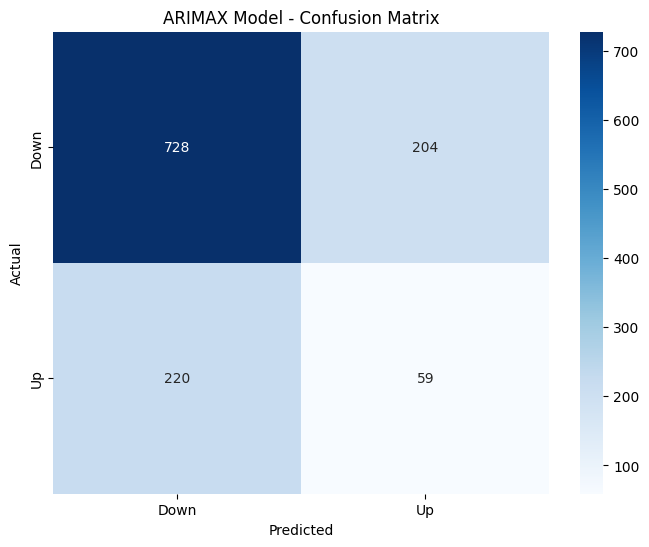


Individual Ticker Performance:
----------------------------------------
AXP: 0.775 (n=1889)
CAT: 0.774 (n=1624)
CSCO: 0.346 (n=375)
HD: 0.125 (n=1667)
IBM: 0.857 (n=390)
JNJ: 0.750 (n=1951)
KO: 0.456 (n=1935)
MCD: 0.761 (n=1532)
MMM: 0.317 (n=783)
MRK: 0.750 (n=2082)
PFE: 0.741 (n=889)
PG: 0.891 (n=896)
TRV: 0.533 (n=1939)
VZ: 0.811 (n=2383)
WBA: 0.897 (n=707)


In [30]:
# Overall Results
if all_predictions:
    overall_accuracy = accuracy_score(all_actuals, all_predictions)
    print(f"\nOverall ARIMAX Model Performance:")
    print(f"Accuracy: {overall_accuracy:.3f}")
    print(f"Total predictions: {len(all_predictions)}")
    
    print("\nDetailed Classification Report:")
    print(classification_report(all_actuals, all_predictions, target_names=['Down', 'Up']))
    
    # Confusion Matrix
    cm = confusion_matrix(all_actuals, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title('ARIMAX Model - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Individual ticker performance
    print(f"\nIndividual Ticker Performance:")
    print("-" * 40)
    for ticker, results in ticker_results.items():
        print(f"{ticker}: {results['accuracy']:.3f} (n={results['data_points']})")

else:
    print("No successful ARIMAX models built!")

In [31]:
   
# Comparison: Logistic Regression with enhanced features
print("\n" + "="*60)
print("COMPARISON: Logistic Regression with Enhanced Features")
print("="*60)

# Prepare features for logistic regression
feature_cols = ['Sentiment_Score', 'strongly_positive_prob', 'moderately_positive_prob', 'neutral_prob',
               'moderately_negative_prob', 'strongly_negative_prob',
                'Sentiment_Strength', 'Volume']
# Add Price_Volatility if it exists
if 'Price_Volatility' in merged_df.columns:
    feature_cols.append('Price_Volatility')

X_full = merged_df[feature_cols].fillna(merged_df[feature_cols].mean())
y_full = merged_df['Target'].fillna(0)

# Remove rows where target is NaN
valid_mask = ~merged_df['Target'].isna()
X_clean = X_full[valid_mask]
y_clean = y_full[valid_mask]

print(f"Logistic Regression dataset: {len(X_clean)} samples, {len(feature_cols)} features")

if len(X_clean) > 100:  # Need sufficient data
    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y_clean, test_size=0.2, random_state=42, 
        stratify=y_clean if y_clean.nunique() > 1 else None
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train logistic regression
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred_lr = lr_model.predict(X_test_scaled)
    y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
    
    print("Logistic Regression Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
    print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr, target_names=['Down', 'Up']))
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'coefficient': lr_model.coef_[0],
        'abs_coefficient': np.abs(lr_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)
    
    print("\nFeature Importance (Logistic Regression):")
    print(feature_importance)
    
    # Model comparison
    print(f"\n{'='*60}")
    print("MODEL COMPARISON SUMMARY")
    print(f"{'='*60}")
    if all_predictions:
        print(f"ARIMAX Overall Accuracy: {overall_accuracy:.3f}")
    print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
    
    if all_predictions and overall_accuracy > accuracy_score(y_test, y_pred_lr):
        print("🏆 ARIMAX performs better!")
    else:
        print("🏆 Logistic Regression performs better!")

else:
    print("Insufficient data for Logistic Regression comparison")

print(f"\n{'='*60}")
print("ANALYSIS COMPLETE!")
print(f"{'='*60}")


COMPARISON: Logistic Regression with Enhanced Features
Logistic Regression dataset: 21042 samples, 9 features
Logistic Regression Results:
Accuracy: 0.766
Training samples: 16833, Test samples: 4209

Classification Report:
              precision    recall  f1-score   support

        Down       0.77      1.00      0.87      3222
          Up       0.00      0.00      0.00       987

    accuracy                           0.77      4209
   macro avg       0.38      0.50      0.43      4209
weighted avg       0.59      0.77      0.66      4209


Feature Importance (Logistic Regression):
                    feature  coefficient  abs_coefficient
7                    Volume    -0.465419         0.465419
8          Price_Volatility     0.112583         0.112583
3              neutral_prob     0.061506         0.061506
5    strongly_negative_prob    -0.049180         0.049180
1    strongly_positive_prob    -0.029457         0.029457
4  moderately_negative_prob    -0.018337         0.018337
